**Sentiment Analysis** is a subfield of natural language processing (NLP) that focuses on **identifying and categorizing opinions** expressed in text, especially to determine whether the writer's attitude towards a particular topic, product, or service is positive, negative, or neutral.

### Lets do sentiment analysis using Natural Language Processing and classify the movie reviews into good or bad.

In [1]:
#download stop words list and import it
import nltk 
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/shreyanbr/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
#load data files from txt_sentoken folder
from sklearn.datasets import load_files
movie_data = load_files("review_polarity/txt_sentoken/")

In [3]:
#take input data 'x' and target data 'y'
x, y = movie_data.data, movie_data.target
print(len(x), len(y))

2000 2000


In [4]:
#know the target label
movie_data.target[0] 
#0- negative, 1- positive

0

Each review contains unnecessary spaces, special characters, punctuation marks, single characters etc. that are not useful for our analysis. These spaces must be removed by applying regular expressions or **regex**.

Use the 're' module for using regular expressions 

In [5]:
import re
#preprocessing of data typ
lst = []

In [6]:
#use word net lemmatizer for getting the root words
from nltk.stem import WordNetLemmatizer
stemmer = WordNetLemmatizer()

In [7]:
#take sentences from the input data - x
for sen in range(0, len(x)):
    #remove all the special characters by a single space
    # \W - Matches any non-alphanumeric character
    txt = re.sub(r'\W', ' ', str(x[sen]))

    #remove all single characters
    # \s - any whitespace charcaters
    txt = re.sub(r'\s+[a-zA-z]\s+',' ', txt)

    txt = re.sub(r'^[a-zA-z]\s+',' ', txt)

    txt = re.sub(r'\s+',' ', txt)

    #converting to lower case
    txt = txt.lower()

    #Lemmatization
    txt = txt.split()
    txt = [stemmer.lemmatize(word) for word in txt]
    txt = ' '.join(txt)

    #add the final text to the list
    lst.append(txt)

lst

['arnold schwarzenegger ha been an icon for action enthusiast since the late 80 but lately his film have been very sloppy and the one liner are getting worse nit hard seeing arnold a mr freeze in batman and robin especially when he say ton of ice joke but hey he got 15 million what it matter to him nonce again arnold ha signed to do another expensive blockbuster that can compare with the like of the terminator series true lie and even eraser nin this so called dark thriller the devil gabriel byrne ha come upon earth to impregnate woman robin tunney which happens every 1000 year and basically destroy the world but apparently god ha chosen one man and that one man is jericho cane arnold himself nwith the help of trusty sidekick kevin pollack they will stop at nothing to let the devil take over the world nparts of this are actually so absurd that they would fit right in with dogma nyes the film is that weak but it better than the other blockbuster right now sleepy hollow but it make the w

The cleaned data is now available in the list 'lst'. This data now can be converted into numeric and score can be allocated to each word depending on its frequency.

In [8]:
len(lst)

2000

In [9]:
#convert text to numbers using TfidVectorizer

from sklearn.feature_extraction.text import TfidfVectorizer
converter = TfidfVectorizer(stop_words=stopwords.words('english'))
x = converter.fit_transform(lst).toarray()


In [10]:
#split the data as training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)

We can now use any classifier model like Logistic Regression, Decision Tree, RandomForest or SVM to understand the review text and classify it into 0 or 1.

Let us use **RandomForest** classifier model with **200 trees**.

In [11]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=200, random_state=0)
classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=0)

In [12]:
#find accuracy score
classifier.score(x_test, y_test)

0.795

In [13]:
#Create confusion matrix to know where our model failed
y_predicted = classifier.predict(x_test)

In [14]:
#here y_test is truth and y_predicted is predicted
from sklearn.metrics import confusion_matrix
conmat = confusion_matrix(y_test, y_predicted)
conmat

array([[168,  40],
       [ 42, 150]])

Text(95.72222222222221, 0.5, 'Predicted')

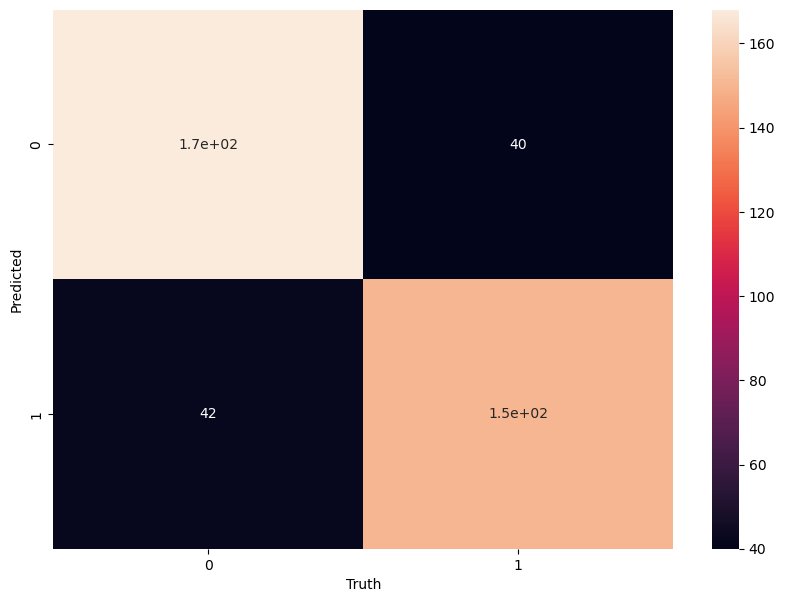

In [15]:
#the above matrix can be shown as plot in seaborn
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
sns.heatmap(conmat, annot=True)
plt.xlabel('Truth')
plt.ylabel('Predicted')

In [16]:
#make predictions for our own review
review1 = "It was so bad"
review2 = "I really enjoyed the climax scene of the movie"

In [17]:
vx = converter.transform([review1,review2]).toarray()
classifier.predict(vx)

array([0, 1])

The output shows that the first review is bad[0] and the 2nd review is a good review [1].